In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sglicod
import h5py

c:\Users\JMRSL-1\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
V, H, imgX, imgY = sglicod.sgli_ll2tile_B0(4800, 114.679553, -8.384211)
print(V, H, imgX, imgY)

9 29 1657.8821683056885 4024.421279999995


Data can download at https://gportal.jaxa.jp/gpr

In [19]:
df = "GC1SG1_20231205D01D_T0929_L2SG_RSRFQ_3002.h5"

In [4]:
df = h5py.File(df, 'r')

In [5]:
list(df.keys())

['Geometry_data',
 'Global_attributes',
 'Image_data',
 'Level_1_attributes',
 'Processing_attributes']

In [6]:
dset = df['Image_data']

In [7]:
list(dset.keys())

['Angstrom',
 'Land_water_flag',
 'PAR',
 'QA_flag',
 'Rp_PL01',
 'Rp_PL02',
 'Rs_PI01',
 'Rs_PI02',
 'Rs_SW01',
 'Rs_SW02',
 'Rs_SW03',
 'Rs_SW04',
 'Rs_VN01',
 'Rs_VN02',
 'Rs_VN03',
 'Rs_VN04',
 'Rs_VN05',
 'Rs_VN06',
 'Rs_VN07',
 'Rs_VN08',
 'Rs_VN08P',
 'Rs_VN09',
 'Rs_VN10',
 'Rs_VN11',
 'Rs_VN11P',
 'SWR',
 'Tau_500',
 'Tb_TI01',
 'Tb_TI02']

In [8]:
dVN08=dset['Rs_VN08']
print(dVN08.dtype)
print(dVN08.shape)

dVN11=dset['Rs_VN11']
print(dVN11.dtype)
print(dVN11.shape)

uint16
(4800, 4800)
uint16
(4800, 4800)


In [9]:
VN08 = np.array(dVN08[:])
print(VN08.dtype)
print(VN08.shape)
VN08

VN11 = np.array(dVN11[:])
print(VN11.dtype)
print(VN11.shape)
VN11

uint16
(4800, 4800)
uint16
(4800, 4800)


array([[65535, 65535, 65535, ...,  2276,  2354,  3168],
       [65535, 65535, 65535, ...,  2776,  2876,  3290],
       [65535, 65535, 65535, ...,  2911,  2915,  3017],
       ...,
       [   27,    22,    34, ...,    83,    74,   120],
       [   30,    26,    47, ...,   104,    96,   116],
       [   19,    30,    18, ...,    74,   108, 65535]], dtype=uint16)

In [10]:
flatVN08 = VN08.flatten()
flatVN11 = VN11.flatten()

In [11]:
iVN08 = flatVN08 * 0.0001
iVN11 = flatVN11 * 0.0001

print(iVN08.dtype)
print(iVN08.shape)
print(iVN11.dtype)
print(iVN11.shape)


float64
(23040000,)
float64
(23040000,)


In [12]:
imgVN08 = np.reshape(iVN08,(4800, 4800))
imgVN11 = np.reshape(iVN11,(4800, 4800))

print(imgVN08)
print(imgVN08.shape)
print(imgVN11)
print(imgVN11.shape)

[[6.5535e+00 6.5535e+00 6.5535e+00 ... 2.1000e-03 1.2600e-02 1.5700e-02]
 [6.5535e+00 6.5535e+00 6.5535e+00 ... 6.9000e-03 1.4100e-02 1.7200e-02]
 [6.5535e+00 6.5535e+00 6.5535e+00 ... 1.0000e-03 1.9000e-03 3.3000e-03]
 ...
 [5.1000e-03 4.7000e-03 6.1000e-03 ... 1.3200e-02 1.1400e-02 2.2400e-02]
 [5.5000e-03 5.0000e-03 9.6000e-03 ... 8.8000e-03 1.1200e-02 1.6300e-02]
 [4.4000e-03 5.6000e-03 4.3000e-03 ... 4.3000e-03 1.3000e-02 6.5535e+00]]
(4800, 4800)
[[6.5535e+00 6.5535e+00 6.5535e+00 ... 2.2760e-01 2.3540e-01 3.1680e-01]
 [6.5535e+00 6.5535e+00 6.5535e+00 ... 2.7760e-01 2.8760e-01 3.2900e-01]
 [6.5535e+00 6.5535e+00 6.5535e+00 ... 2.9110e-01 2.9150e-01 3.0170e-01]
 ...
 [2.7000e-03 2.2000e-03 3.4000e-03 ... 8.3000e-03 7.4000e-03 1.2000e-02]
 [3.0000e-03 2.6000e-03 4.7000e-03 ... 1.0400e-02 9.6000e-03 1.1600e-02]
 [1.9000e-03 3.0000e-03 1.8000e-03 ... 7.4000e-03 1.0800e-02 6.5535e+00]]
(4800, 4800)


Text(0, 0.5, 'Reflectance of VN08')

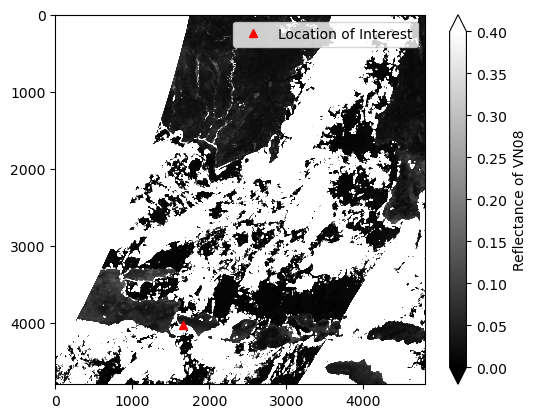

In [13]:
figVN08, ax = plt.subplots() 
cs08 = ax.imshow(imgVN08, vmin=0.0, vmax=0.4, cmap='gray')
ax.plot(1657, 4024, 'r^', label='Location of Interest')
ax.legend()
ax.axis('on')
cbar = figVN08.colorbar(cs08, extend='both')
cbar.ax.set_ylabel('Reflectance of VN08')

Text(0, 0.5, 'Reflectance of VN11')

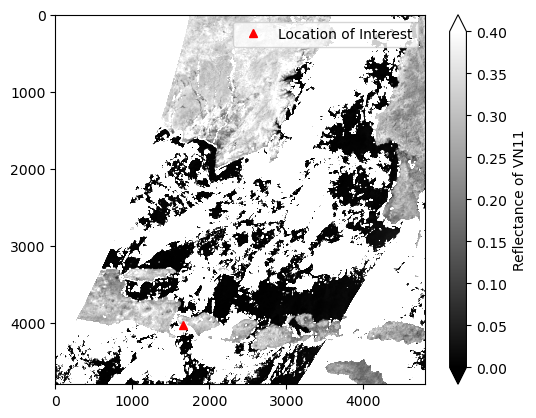

In [14]:
figVN11, ax = plt.subplots()
ax.margins(x=1000, y=4000) 
cs11 = ax.imshow(imgVN11, vmin=0.0, vmax=0.4, cmap='gray')
ax.plot(1657, 4024, 'r^', label='Location of Interest')
ax.legend()
ax.axis('on')
cbar = figVN11.colorbar(cs11,extend='both')
cbar.ax.set_ylabel('Reflectance of VN11')

Extract a 301x301 pixel area centered on your chosen point from the binary data and display it using matplotlib. 

Text(0, 0.5, 'Reflectance of VN08')

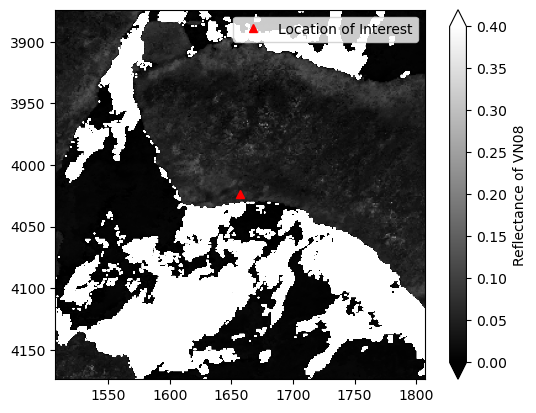

In [15]:
figVN08, ax = plt.subplots() 
cs08 = ax.imshow(imgVN08, vmin=0.0, vmax=0.4, cmap='gray')
ax.axis('on')
ax.plot(1657, 4024, 'r^', label='Location of Interest')
ax.legend()
plt.axis([1507, 1807, 4174, 3874])
cbar = figVN08.colorbar(cs08,extend='both')
cbar.ax.set_ylabel('Reflectance of VN08')

Text(0, 0.5, 'Reflectance of VN11')

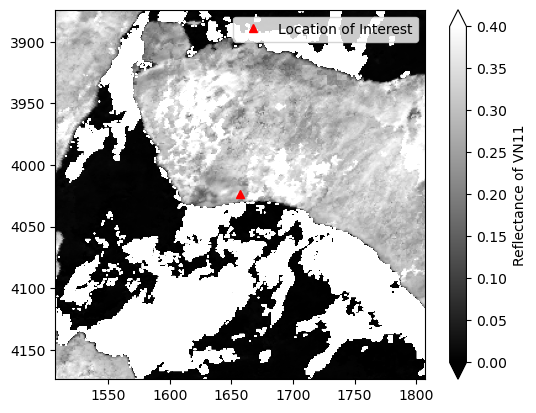

In [16]:
figVN11, ax = plt.subplots() 
cs11 = ax.imshow(imgVN11, vmin=0.0, vmax=0.4, cmap='gray')
ax.axis('on')
ax.plot(1657, 4024, 'r^', label='Location of Interest')
ax.legend()
plt.axis([1507, 1807, 4174, 3874])
cbar = figVN11.colorbar(cs11,extend='both')
cbar.ax.set_ylabel('Reflectance of VN11')

GCOM-C

NDVI = (867.12 nm – 672.10 nm) / (867.12 nm + 672.10 nm)

NDVI = (VN11 - VN08)/(VN11 + VN08)

In [17]:
NDVI = (imgVN11 - imgVN08)/(imgVN11 + imgVN08)
print(NDVI.shape)

(4800, 4800)


Text(0.5, 1.0, 'NDVI')

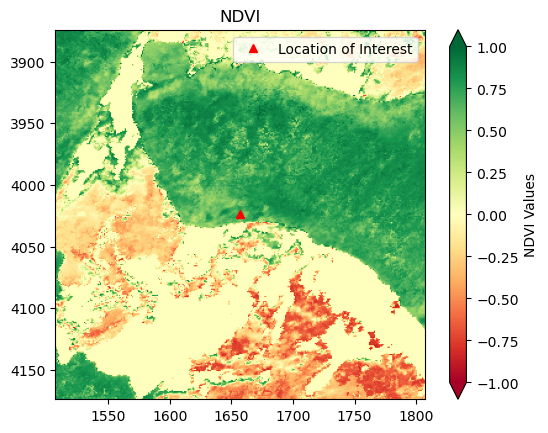

In [18]:
figNDVI, ax = plt.subplots() 
csNDVI = ax.imshow(NDVI, vmin=-1.0, vmax=1.0, cmap='RdYlGn')
ax.axis('on')
ax.plot(1657, 4024, 'r^', label='Location of Interest')
ax.legend()
cbar = figNDVI.colorbar(csNDVI,extend='both')
cbar.ax.set_ylabel('NDVI Values')
plt.axis([1507, 1807, 4174, 3874])
plt.title("NDVI")